# Data Science Module 1 Final Project: <br>Predicting the Sale Price of Houses in King County

Student Names: Natasha Kacoroski and David Kaspar <br>
Student Pace: Full time <br>
Scheduled Project Review Date/Time: 17 April 2019, 10:45 a.m. <br>
Instructor Names: Miles Erickson and Greg Damico <br>
Blog Post URL: TBD <br>

## Step 1: Load Packages and Import Data

We decided to import the following libraries. !!!EXPLAIN WHY!!!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn as sk
from scipy.stats import zscore, norm
from scipy import stats

%matplotlib inline

Imported the data from a csv file into a pandas dataframe.

In [2]:
df_total = pd.read_csv('kc_house_data.csv')
msk = np.random.rand(len(df_total)) < 0.85

In [3]:
df = df_total[msk]
validate_df = df_total[~msk]

Only uncomment the cell below at the end to validate model.

In [4]:
# df = validate_df

## Step 2: Scrub Data

### Preview and Initial Observations

The first step of data cleaning is to take an initial look at the dataset and see what it looks like, using transpose allows us to see all the columns easily.

In [5]:
df.head().T

,8,9,13,19,21
id,2414600126,3793500160,6054650070,7983200060,2524049179
date,4/15/2015,3/12/2015,10/7/2014,4/24/2015,8/26/2014
price,229500,323000,400000,230000,2e+06
bedrooms,3,3,3,3,3
bathrooms,1,2.5,1.75,1,2.75
sqft_living,1780,1890,1370,1250,3050
sqft_lot,7470,6560,9680,9774,44867
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,4


Looking at the head of the dataframe, we can see that the columns are the appropriate data labels not the first entry. To confirm and check the column information we imported the .md file on column information.

In [6]:
from IPython.display import display, Markdown

with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

Column Names and Descriptions for King County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


Looking at the column information, most columns descriptions confirm our initial understanding of the column name. We learn that view means whether the house has been viewed (assumed to be potential buyers), and sqft_living15 and sqft_lot15 refers to the square footage of interior housing living space and land lots for nearest 15 neighbors, respectively. Also of interest is the grade given to housing unit based on King County grading system. We looked up the King County grading system here: <br> https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r <br>
to understand the grading system.

BUILDING GRADE <br>
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish     work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13  = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

After getting a better understanding of each column, we moved to looking at values within each column. We also had the initial thought of moving the id column to be the primary key if there are no duplicates. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 8 to 21596
Data columns (total 21 columns):
id               3253 non-null int64
date             3253 non-null object
price            3253 non-null float64
bedrooms         3253 non-null int64
bathrooms        3253 non-null float64
sqft_living      3253 non-null int64
sqft_lot         3253 non-null int64
floors           3253 non-null float64
waterfront       2906 non-null float64
view             3248 non-null float64
condition        3253 non-null int64
grade            3253 non-null int64
sqft_above       3253 non-null int64
sqft_basement    3253 non-null object
yr_built         3253 non-null int64
yr_renovated     2635 non-null float64
zipcode          3253 non-null int64
lat              3253 non-null float64
long             3253 non-null float64
sqft_living15    3253 non-null int64
sqft_lot15       3253 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 559.1+ KB


The shape of our data is 21,587 entries and 21 columns, with data types of float64(8), int64(11), and object(2). There are null values in waterfront, view, and yr_renovated. Columns to consider changing data types are: id from int64 to a object (value is independent of magnitude), date to a timestamp (makes it easier to manipulate), sqft_basement from object to int64 (value is dependent on magnitude), yr_built is int64 while yr_renovated is float64 is odd - needs further investigation, and zipcode from int64 to object (value is independent of magnitude). It would also be useful to know which columns contain continuous or discrete data because that will influence how we deal with null values and will be a factor in determining one-hot encoding.

### Address null values and determine if values are continuous or discrete

In [8]:
def null_percentage_and_data_continuity(df):
    """Returns percentage of null values in data column if nulls exist 
    and whether data is likely continuous or discrete."""
    display_df = df.head(1).applymap(type)
    percent_nan = {}
    disc_or_cont = {}
    for i, col in enumerate(df):
        col_percent_nan = round(100*df[col].isna().sum() / len(df[col]), 2)
        percent_nan[col] = [col_percent_nan]
        if df[col].nunique() < 100:
            disc_or_cont[col] = ['disc']
        else:
            disc_or_cont[col] = ['cont']
    percent_nan_df = pd.DataFrame.from_dict(percent_nan, orient='columns')
    disc_or_cont_df = pd.DataFrame.from_dict(disc_or_cont, orient='columns')
    final = pd.concat([display_df, percent_nan_df, disc_or_cont_df]).T
    final.columns = ['dtype', 'percent null', 'disc or cont']
    return final

In [9]:
null_percentage_and_data_continuity(df)

,dtype,percent null,disc or cont
id,<class 'int'>,0,cont
date,<class 'str'>,0,cont
price,<class 'float'>,0,cont
bedrooms,<class 'int'>,0,disc
bathrooms,<class 'float'>,0,disc
sqft_living,<class 'int'>,0,cont
sqft_lot,<class 'int'>,0,cont
floors,<class 'float'>,0,disc
waterfront,<class 'float'>,10.67,disc
view,<class 'float'>,0.15,disc


Starting with waterfront, 11% of the values are null and the data appears to be discrete. Let's check the unique values.

In [10]:
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())
for count in list(df['waterfront'].value_counts()):
    print(count / sum(list(df['waterfront'].value_counts()))*100)

[ 0. nan  1.]
0.0    2888
1.0      18
Name: waterfront, dtype: int64
99.3805918788713
0.6194081211286993


Waterfront is binary, where 0 is no waterfront view and 1 means that there is a waterfront view. Null values are if waterfront view is unknown. Since the value count of 0 is significantly more common (99.2%), we decided to replace all null values with 0.

In [11]:
df['waterfront'] = df['waterfront'].fillna(0.0)
df['waterfront'].isna().any()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False

Moving onto view. The description for view is "has been viewed." Although we cannot confirm, we picture this as the number of people who have viewed the house at the time that the data for this house sale was collected. 0.29% of the view values are null and it appears to be discrete. Below we check the unique values.

In [12]:
print(df['view'].unique())
print(df['view'].value_counts())
print(df['view'].median())
for count in list(df['view'].value_counts()):
    print(count / sum(list(df['view'].value_counts()))*100)

[ 0.  4.  2.  1.  3. nan]
0.0    2967
2.0     120
3.0      72
1.0      47
4.0      42
Name: view, dtype: int64
0.0
91.34852216748769
3.6945812807881775
2.2167487684729066
1.4470443349753694
1.293103448275862


Since the value count of 0 is significantly more common (90.2%, also the median), we decided to replace all null values with 0.

In [13]:
df['view'] = df['view'].fillna(0.0)
df['view'].isna().any()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False

For yr_renovated, the values are the year where any renovations took place. They appear to be discrete and 17.8% of the values are null. Below are the unique values.

In [14]:
print(df['yr_renovated'].value_counts().head())
renovated_num = df.loc[df['yr_renovated'] > 0, :].shape[0]
renovated_num/len(df)*100

0.0       2538
2014.0       9
2013.0       7
2007.0       7
1990.0       4
Name: yr_renovated, dtype: int64


2.981862895788503

Looking at the unique values we see that null and 0 are values for year renovated. We were already aware of the nulls, and decide that 0 could either mean that house was never renovated or renovations were not tracked. We decided to drop year renovated because of the uncertainty and because actual house renovations are only 3.4% of the year renovated values. 

In [15]:
df = df.drop('yr_renovated', axis=1)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Change data types

For the ID column we considered changing the values to an object and making that the primary key. From looking at unique values for the column (see below), we saw that there were some duplicates because the ID seems to refer to house sale instance, and some houses have been sold more than once. Since the ID column is not valuable to us as a primary key, we decided to drop the column. We also considered dropping duplicate values, but since we are using data about all house sale instances, we decided to keep it in.

In [16]:
df['id'].duplicated().any()

True

In [17]:
df = df.drop('id', axis=1)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

To change the sqft_basement from an object to an integer, we tried using pd.to_numeric, this returned an error. looking at unique values we can see that the only non-numeric value are questionmarks. !!!WRITE FUNCTION INSTEAD!!!

In [18]:
df['sqft_basement'].unique()

array(['730.0', '0.0', '720.0', '?', '990.0', '600.0', '700.0', '500.0',
       '290.0', '560.0', '1010.0', '650.0', '630.0', '400.0', '210.0',
       '450.0', '1150.0', '1950.0', '960.0', '300.0', '1070.0', '180.0',
       '935.0', '440.0', '1470.0', '740.0', '470.0', '1450.0', '820.0',
       '120.0', '620.0', '330.0', '670.0', '1030.0', '680.0', '800.0',
       '1110.0', '1810.0', '530.0', '1180.0', '1050.0', '940.0', '640.0',
       '1590.0', '430.0', '840.0', '1040.0', '2020.0', '340.0', '1250.0',
       '890.0', '950.0', '750.0', '690.0', '240.0', '660.0', '1000.0',
       '920.0', '1140.0', '1300.0', '590.0', '140.0', '900.0', '1190.0',
       '1280.0', '760.0', '1670.0', '1170.0', '1800.0', '1620.0',
       '1090.0', '1480.0', '1410.0', '2500.0', '1320.0', '810.0',
       '1350.0', '850.0', '540.0', '2350.0', '480.0', '200.0', '520.0',
       '2130.0', '510.0', '390.0', '250.0', '1850.0', '490.0', '780.0',
       '420.0', '243.0', '1600.0', '60.0', '1020.0', '1024.0', '1120.0',

In [19]:
print(df['sqft_basement'].value_counts().head())
questionmark_num = df.loc[df['sqft_basement'] == '?', :].shape[0]
questionmark_num/len(df)*100

0.0      1951
?          78
700.0      37
400.0      30
900.0      29
Name: sqft_basement, dtype: int64


2.3977866584691054

Although the questionmark has the second highest value count, that is only 2.1% of the sqft_basement values, so we decided to convert all the questionmark values to the median value because that is the measure of centrality that is least likely to skew our data.  

In [20]:
basement_med = pd.to_numeric(df['sqft_basement'].loc[df['sqft_basement'] != '?']).median()
print(basement_med)
df.sqft_basement = df.sqft_basement.replace('?', basement_med)

0.0


In [21]:
df.sqft_basement = pd.to_numeric(df['sqft_basement'])
df.sqft_basement.dtype

dtype('float64')

Moving on to zipcode, all the unique values look like reasonable zipcodes, so we convert them to strings.

In [22]:
df.zipcode.unique()

array([98146, 98038, 98074, 98003, 98040, 98030, 98052, 98053, 98117,
       98105, 98004, 98042, 98133, 98023, 98103, 98077, 98144, 98022,
       98107, 98059, 98166, 98168, 98031, 98118, 98006, 98108, 98112,
       98065, 98027, 98072, 98178, 98045, 98075, 98019, 98028, 98116,
       98001, 98029, 98034, 98032, 98055, 98119, 98058, 98126, 98010,
       98188, 98092, 98102, 98011, 98115, 98106, 98008, 98056, 98122,
       98125, 98109, 98033, 98177, 98070, 98155, 98024, 98199, 98198,
       98136, 98007, 98148, 98002, 98039, 98014, 98005])

In [23]:
df['zipcode'] = df['zipcode'].astype(str)

In [24]:
df['zipcode'].dtype

dtype('O')

The last data type change is to change the date column from object to date type so that it is easier to manipulate.

In [25]:
df['date'].head()

8     4/15/2015
9     3/12/2015
13    10/7/2014
19    4/24/2015
21    8/26/2014
Name: date, dtype: object

In [26]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")
df.date.dtype

dtype('<M8[ns]')

### Feature Scaling

We think that specific dates will not be significant in predicting housing price so we decided to bin by year and by month, adding a column for each to our dataframe and removing date. 

In [27]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df = df.drop(['date'], axis=1)

After our initial exploratory data analysis, we discovered that year is mostly binary, with data from only 2014 and 2015. We decided to drop year and change month to a string. Before multiple linear regression we will on-hot-encode month.

In [28]:
df = df.drop(['year'], axis=1)

In [29]:
df['month'].dtype

dtype('int64')

In [30]:
df['month'] = df['month'].astype(str)
df['month'].dtype

dtype('O')

For location data, we decided to use latitude and longitude to calculate distance from employment center, using the Pike Pine Retail Core in Seattle as the epicenter. We will consider using zipcodes as well with one-hot encoding.

In [31]:
long_lat = df[['long', 'lat']]

In [32]:
#  adapted from:  https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points/4913653

from math import radians, cos, sin, asin, sqrt

def haversine(df_lon_lat, lon2=-122.336283, lat2=47.609395):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees), in this case the 2nd point is in the Pike Pine Retail Core
    """
    lon1, lat1 = df_lon_lat[0], df_lon_lat[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

df['dist_to_seattle'] = long_lat.apply(haversine, axis=1)
df = df.drop(['lat', 'long'], axis=1)

## Step 2: Exploratory Data Analysis of King County Housing Data

To get an initial visualization of our data we made joint plots of all our predictor variables and the target variable. 

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'month', 'dist_to_seattle'],
      dtype='object')

In [34]:
eda_variable_df = df.drop(['price', 'zipcode', 'month'], axis=1)

In [35]:
def make_jp(data):
    """Make joint plot of each predictor variable and target uvariable"""
    for i, col in enumerate(data):
        sns.jointplot(data[col], df['price'], kind='reg', scatter_kws={'alpha':0.15}, height=8)


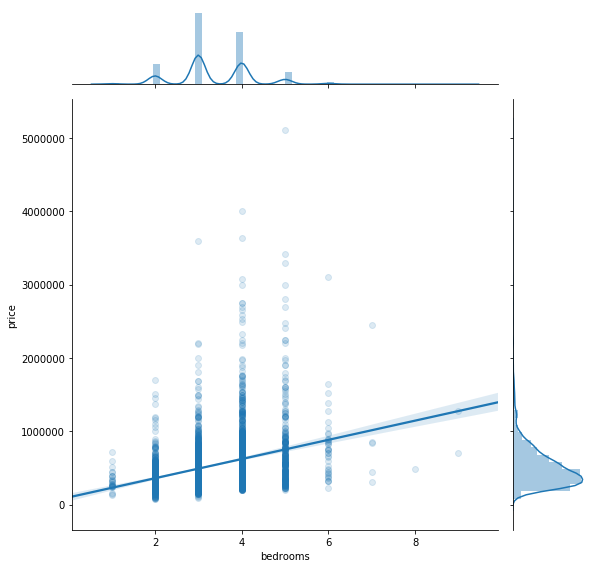

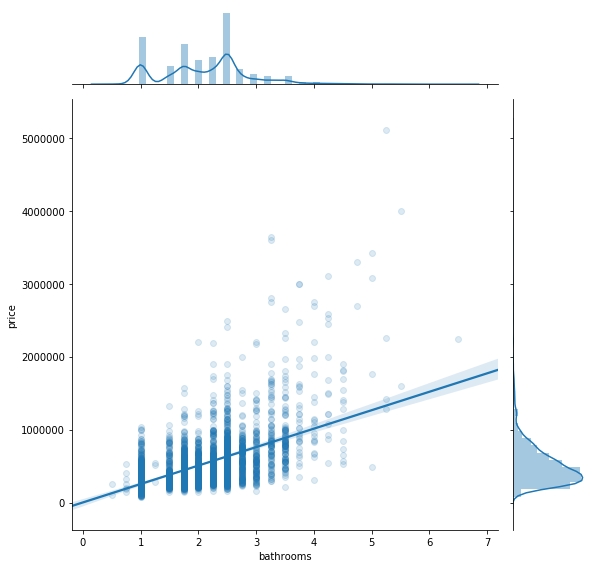

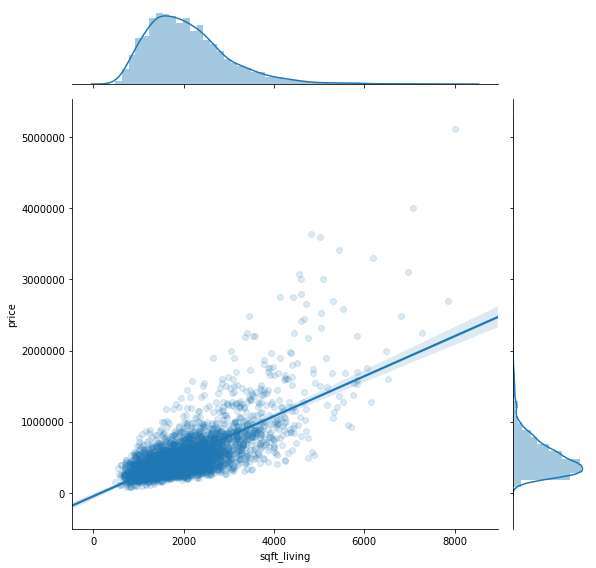

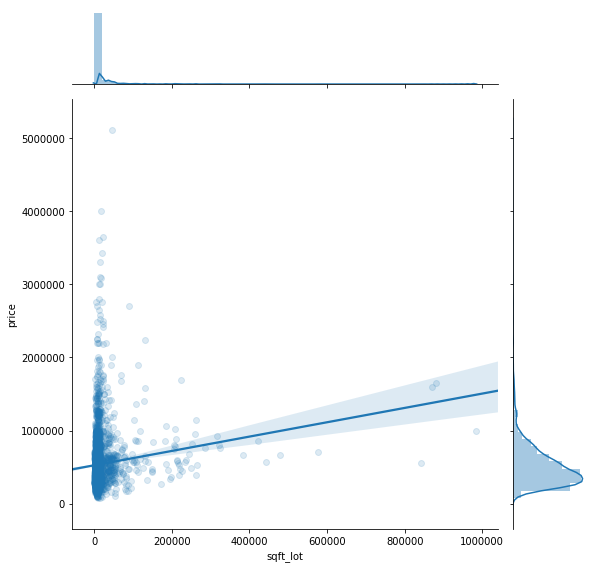

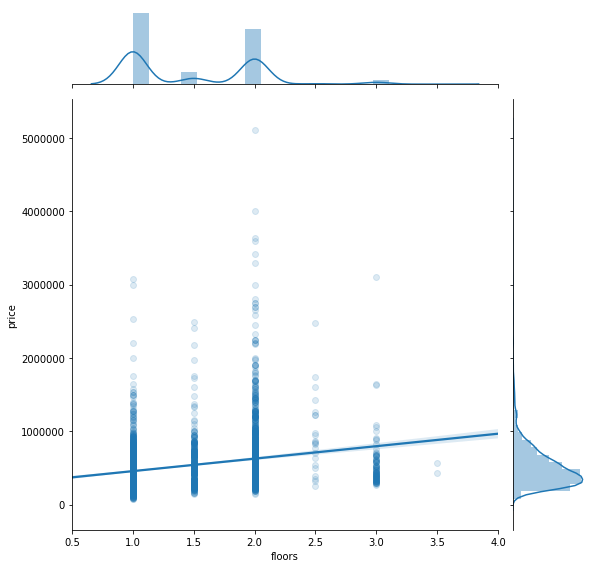

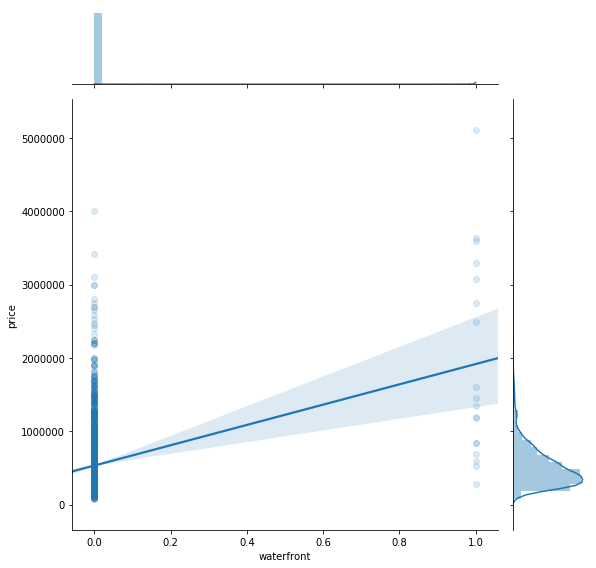

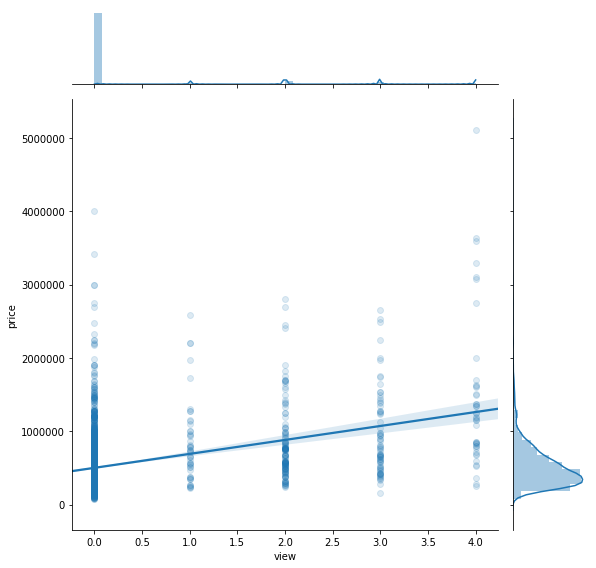

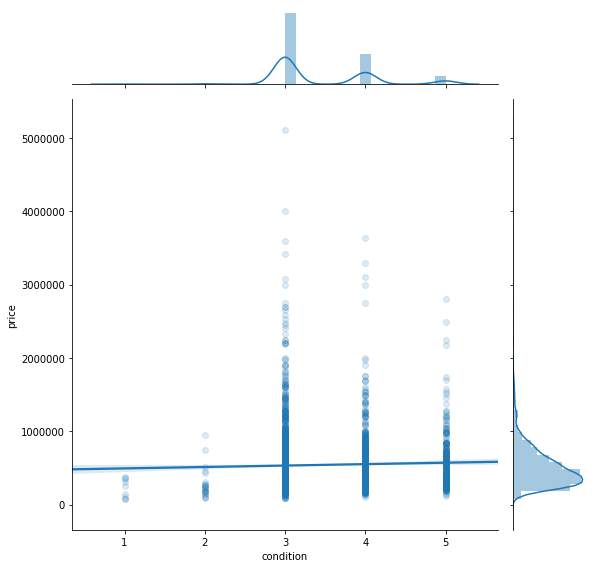

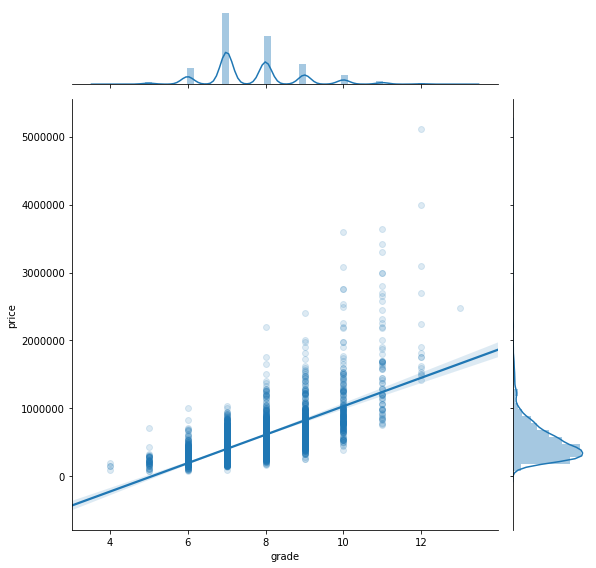

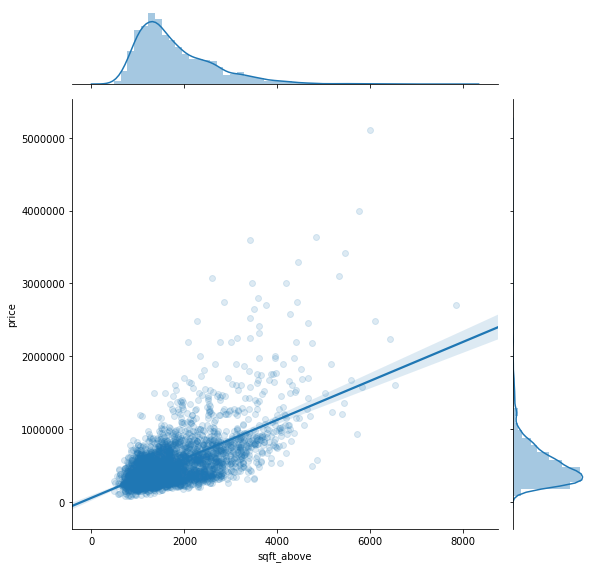

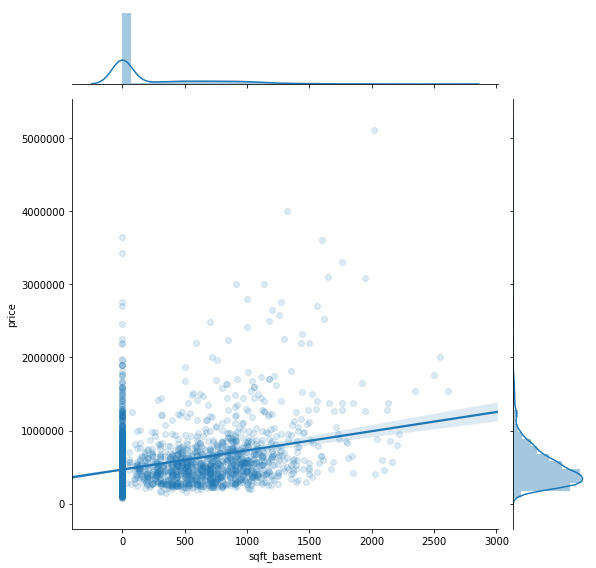

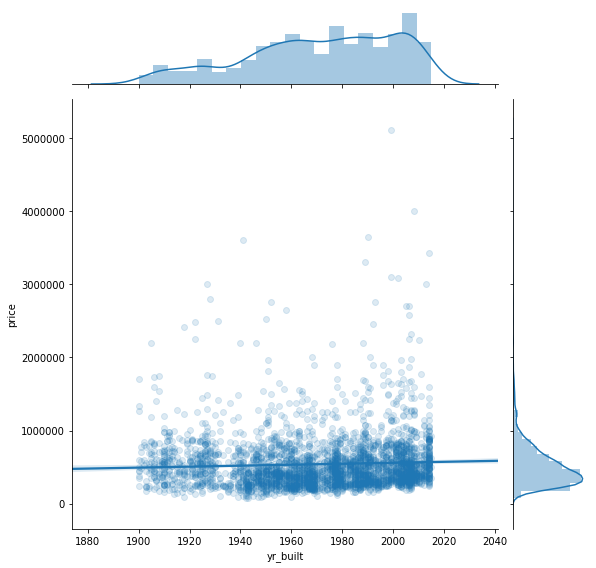

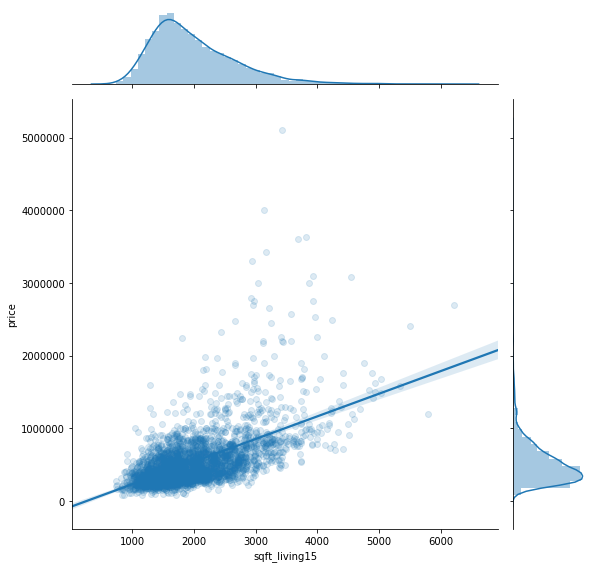

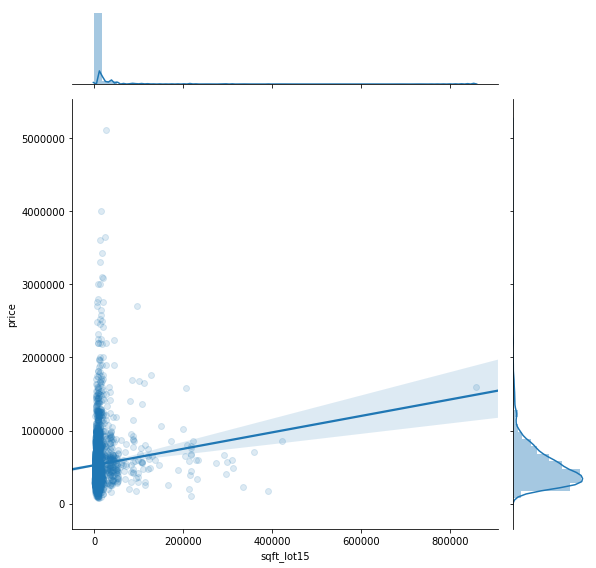

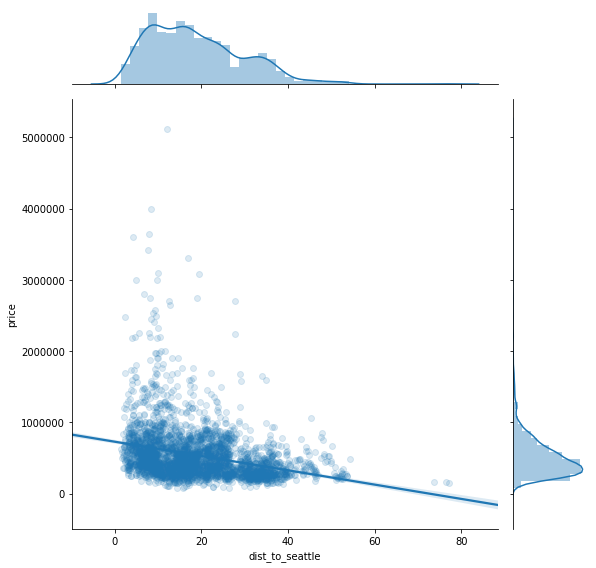

In [36]:
make_jp(eda_variable_df)

### Check for Multicollinearity

First, we made a heatmap to get a visual of the correlation matrix for our data.

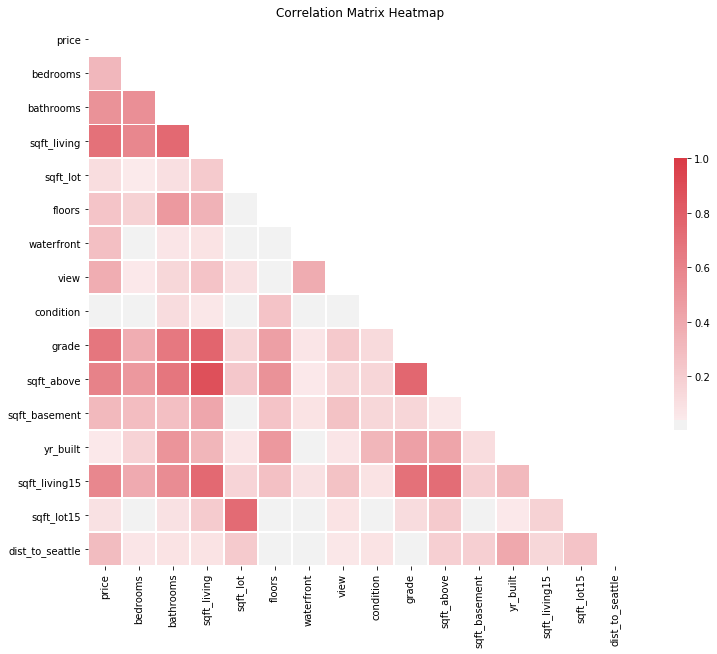

In [37]:
def corr_matrix(df):
    """Make a correlation matrix to check data for collinearity."""
    # Compute the correlation matrix
    corr = np.abs(df.corr())

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    plt.title('Correlation Matrix Heatmap')
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});
    
corr_matrix(df)

We decided to use the absolute value of 0.7 as a cut-off for high correlation.

In [38]:
df_corr = abs(df.corr()) > 0.70
df_corr.sum()

price              2
bedrooms           1
bathrooms          2
sqft_living        6
sqft_lot           2
floors             1
waterfront         1
view               1
condition          1
grade              4
sqft_above         4
sqft_basement      1
yr_built           1
sqft_living15      4
sqft_lot15         2
dist_to_seattle    1
dtype: int64

Square Foot Living is the highest offender for collinearity, however from our domain knowledge and from our test model of a linear regression it also seems to be a good predictor model. For now we will keep it in our variable dataframe for predicting housing price and test our model with removing it, and other variables with high collinearity. For now we will create a variable dataframe of predictor variables to explore, dropping latitude, longitude, and zipcode columns.

## Step 3: Modeling of King County Housing Data with Multivariate Linear Regression

### On-Hot-Encoding

Before modeling we on-hot-encoded zipcode and month.

In [39]:
z_dummies = pd.get_dummies(df['zipcode'], prefix='z')
m_dummies = pd.get_dummies(df['month'], prefix='m')

In [40]:
df = df.drop(['zipcode', 'month'], axis=1)

In [41]:
numeric_df = df

In [42]:
numeric_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'dist_to_seattle'],
      dtype='object')

In [43]:
df = pd.concat([df, z_dummies, m_dummies], axis=1)

And prepared our dataframes for modeling.

In [44]:
variable_df = df.drop('price', axis=1)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

all_model_mae = {}

def linreg_tts(data, response, k=5):
    y = response
    X = data
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    predictions = linreg.predict(X_test)

    plt.scatter(y_test, predictions)
    plt.xlabel(f"True Values")
    plt.ylabel(f"Multi Variable Linear Predictions")
    print("Single LinReg Score:", model.score(X_test, y_test))  
    
    cross_val_array = cross_val_score(linreg, X, y, cv=k, scoring="neg_mean_absolute_error")#"neg_mean_squared_error")
    avg_cross_val = np.mean(cross_val_array)
    #rmse = np.abs(avg_cross_val)**.5
    mae = -avg_cross_val
    all_model_mae[(mae, cross_val_array.std())] = list(data.columns)
    print(f"MAE with {k} folds:{mae}")
    return model


Single LinReg Score: 0.5072382448801922
MAE with 5 folds:177180.99527764035


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

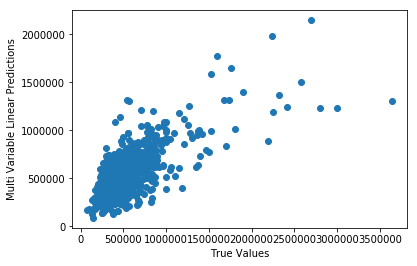

In [46]:
linreg_tts(df[['sqft_living']], df[['price']])

Single LinReg Score: 0.8486872241995944
MAE with 5 folds:96104.39568110961


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

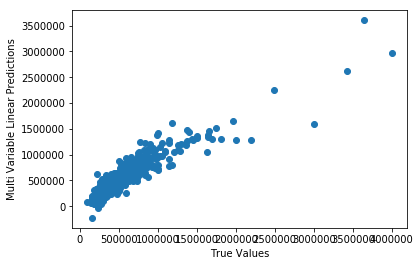

In [47]:
linreg_tts(variable_df, df[['price']])

In [48]:
numeric_df['price'] = df['price']
no_outliers = df[(np.abs(zscore(numeric_df.loc[:, numeric_df.columns])) < 3).all(axis=1)]   
no_outliers.shape

(2948, 98)

Single LinReg Score: 0.8351216766341938
MAE with 5 folds:68563.95569968096


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

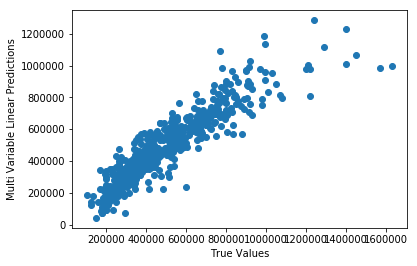

In [49]:
linreg_tts(no_outliers.drop(['price'], axis=1), no_outliers['price'])

Interesting, removing outliers actually made our model worse, perhaps there's a better way. Often, models that grow faster the further away from zero they are (either power models: y = A * x^n  -or-  exponential: y = A * B^x) can yield better results when we take the log of them to regroup the data in something closer to a linear model. Let's test each variable to see if a log transform would benefit the model.

--------------------- price --------------------------


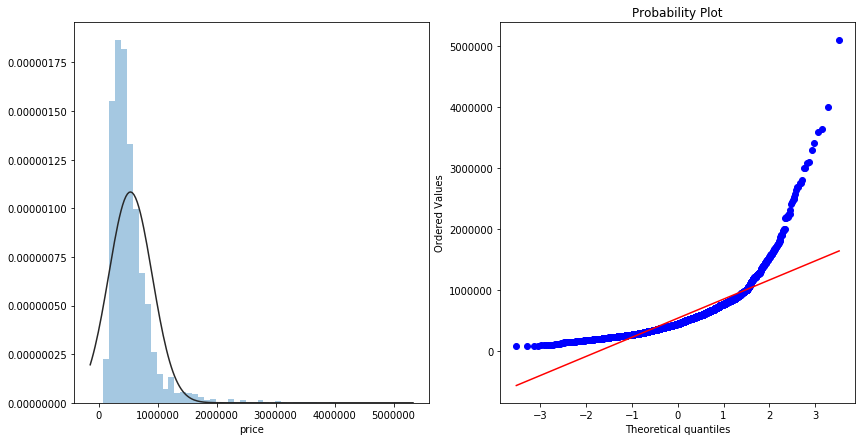

--------------------- bedrooms --------------------------


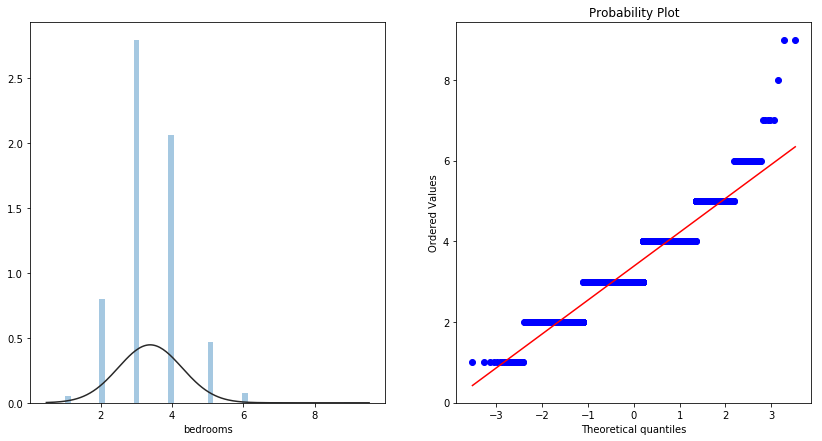

--------------------- bathrooms --------------------------


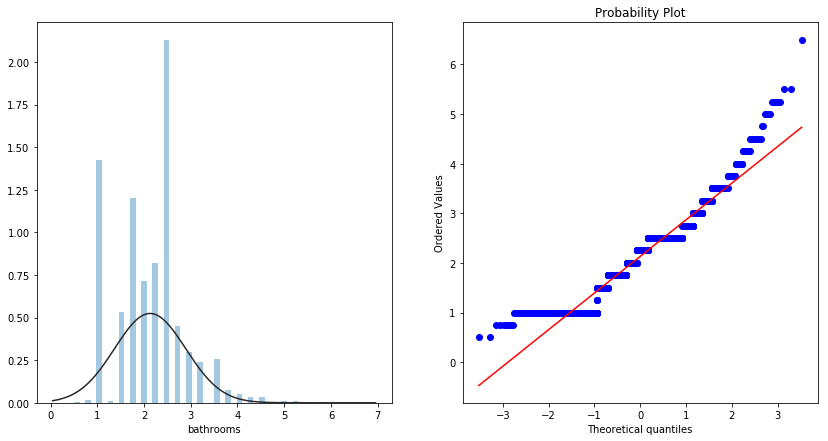

--------------------- sqft_living --------------------------


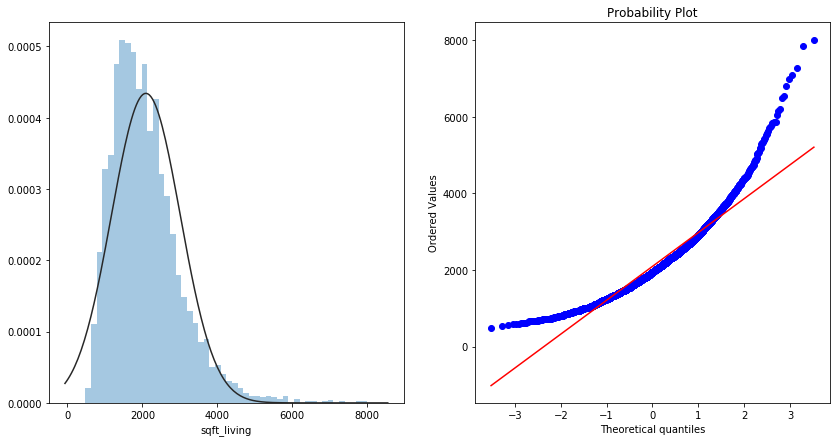

--------------------- sqft_lot --------------------------


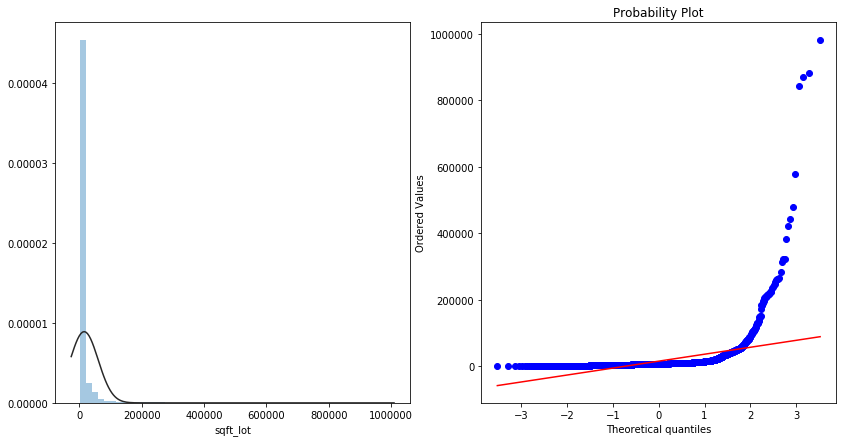

--------------------- floors --------------------------


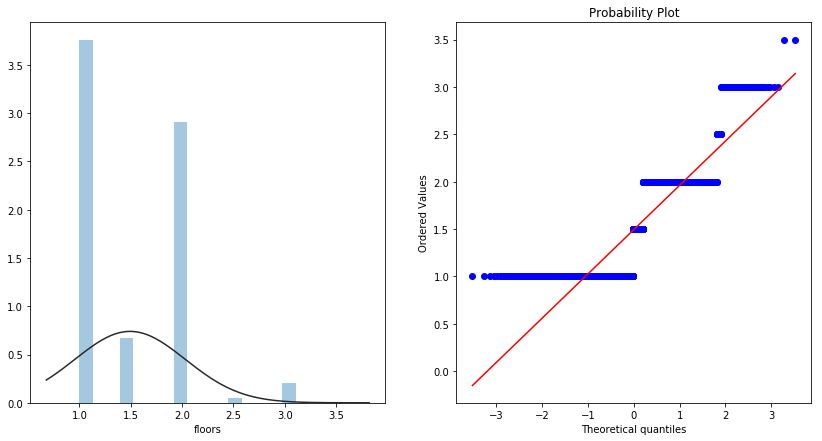

--------------------- waterfront --------------------------


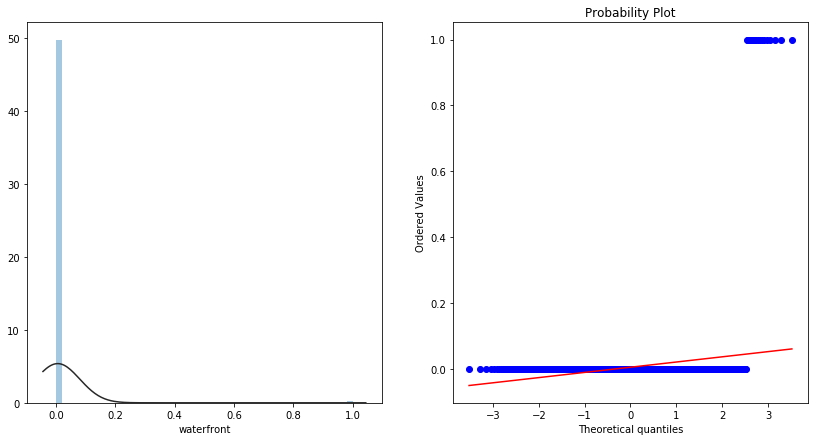

--------------------- view --------------------------


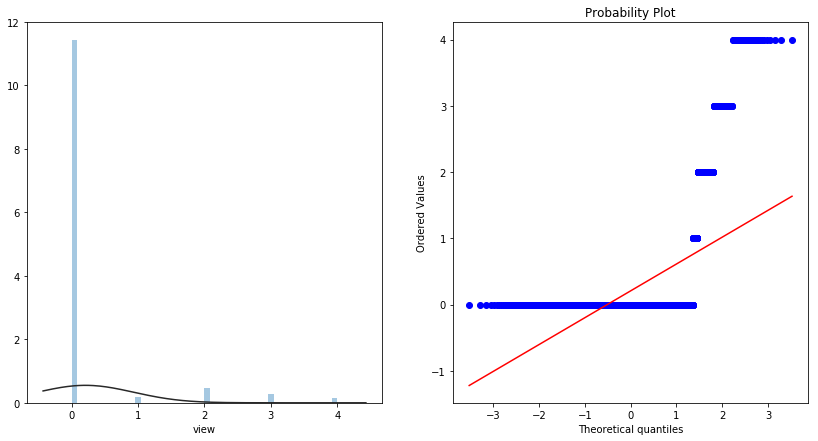

--------------------- condition --------------------------


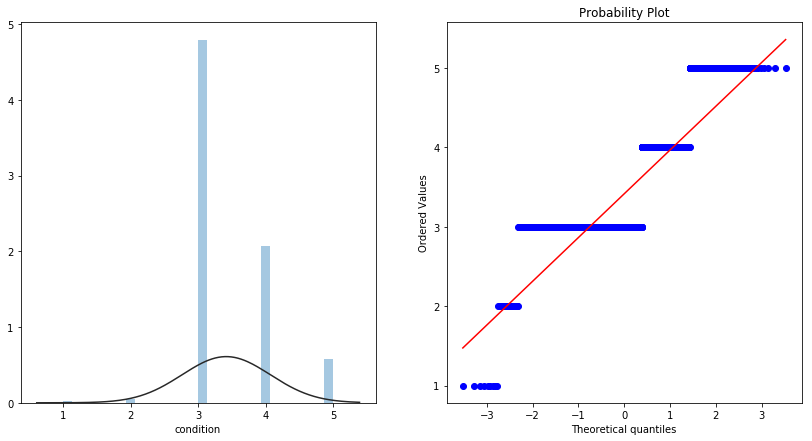

--------------------- grade --------------------------


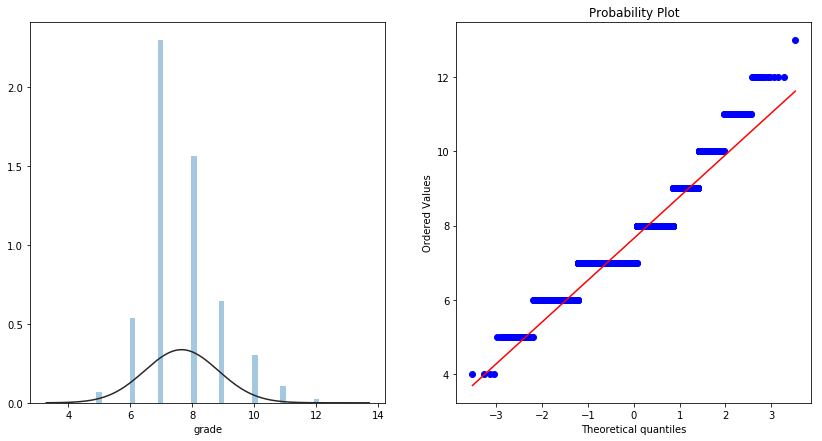

--------------------- sqft_above --------------------------


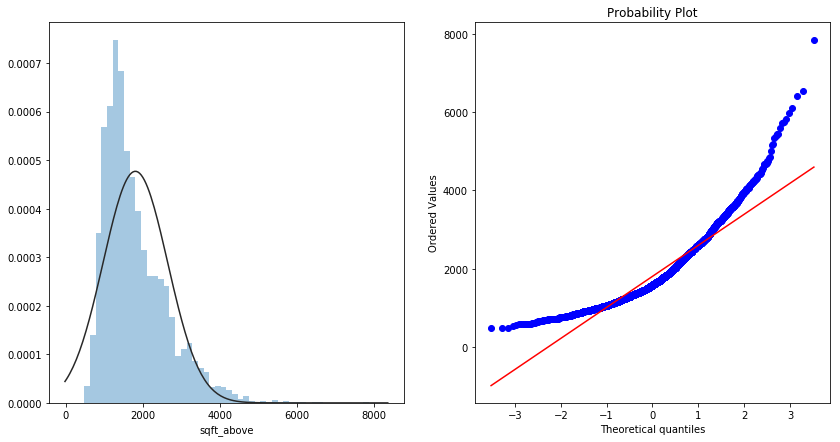

--------------------- sqft_basement --------------------------


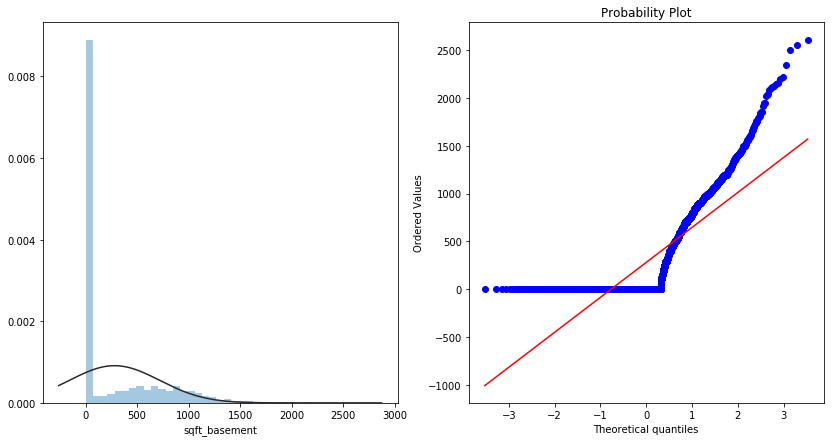

--------------------- yr_built --------------------------


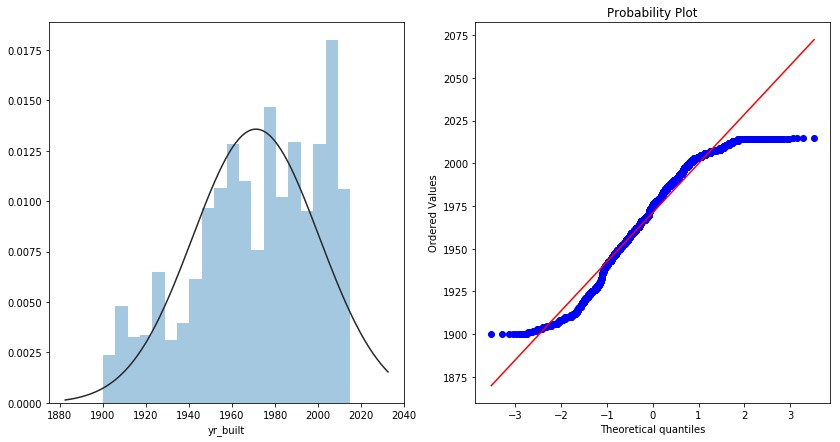

--------------------- sqft_living15 --------------------------


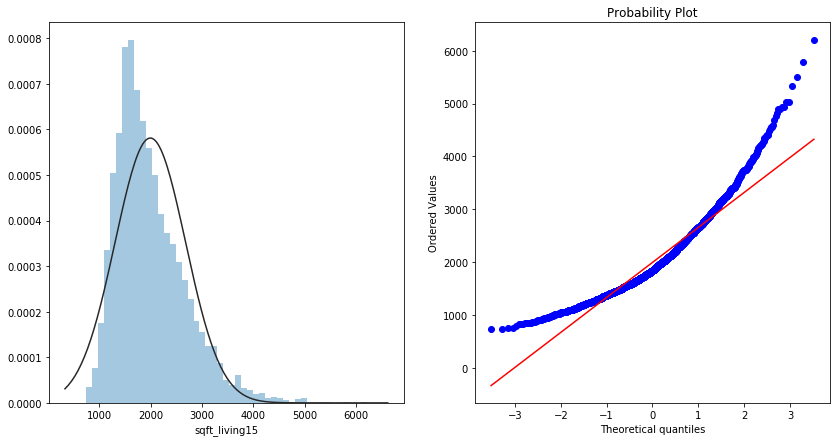

--------------------- sqft_lot15 --------------------------


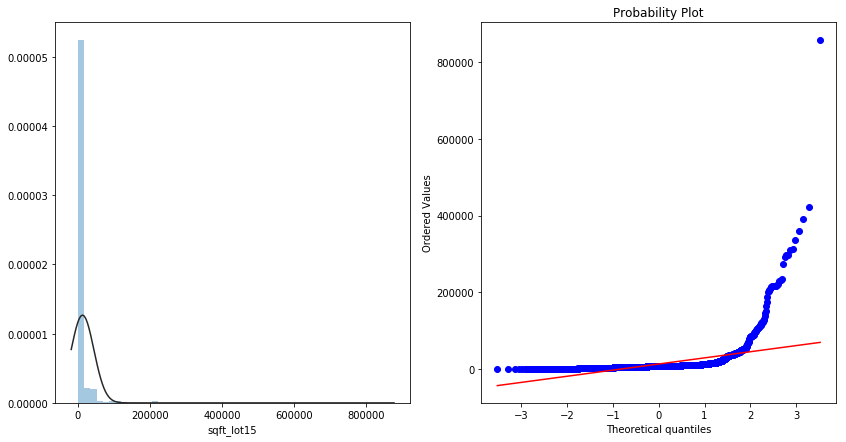

--------------------- dist_to_seattle --------------------------


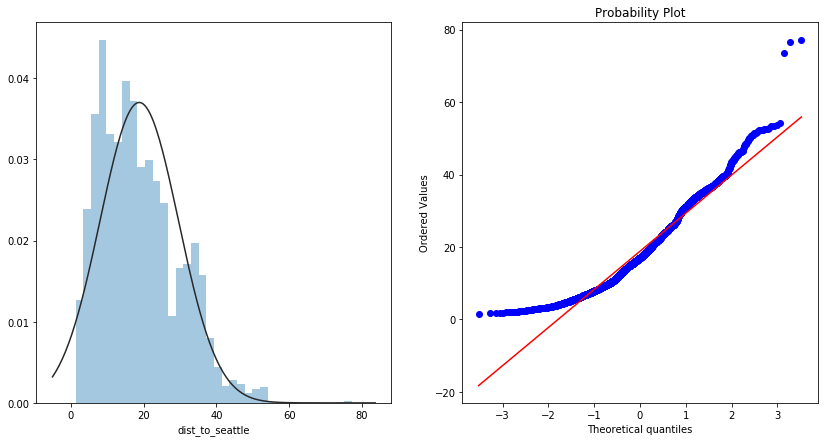

In [50]:
to_log_or_not_to_log = numeric_df

def log_test(df):
    for col in df.columns:
        print('---------------------',col,'--------------------------')
        plt.figure(figsize=(14,7))
        plt.subplot(1,2,1)
        sns.distplot(df[col], fit=norm, kde=False)
        plt.subplot(1,2,2)
        stats.probplot(df[col], plot=plt)
        plt.show()
        
log_test(to_log_or_not_to_log)

In [51]:
to_log = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'dist_to_seattle']

def log_data(data=df, to_log=to_log):
    """Creates dataframe with logged data in columns defined by to_log."""
    logged_data = data.copy()
    
    for col in to_log:
        header = "log_of_"+col
        logged_data[header] = np.log(logged_data[col])
        logged_data = logged_data.drop(col, axis=1)
    return logged_data

logged_data = log_data(df)
logged_data_no_outliers = log_data(no_outliers)

Single LinReg Score: 0.8994796315603526
MAE with 5 folds:0.13462313632432718


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

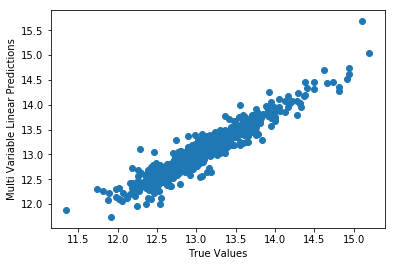

In [52]:
linreg_tts(logged_data.drop(['log_of_price'], axis=1), logged_data[['log_of_price']])

Single LinReg Score: 0.8682462636780954
MAE with 5 folds:0.128280620218879


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

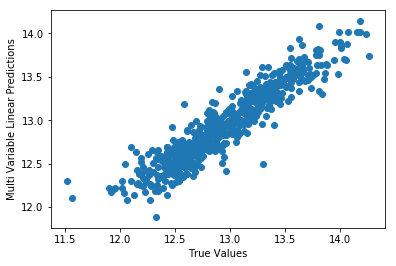

In [53]:
linreg_tts(logged_data_no_outliers.drop(['log_of_price'], axis=1), logged_data_no_outliers[['log_of_price']])

In [54]:
logged_data_no_outliers.head()

,bedrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,z_98001,z_98002,...,m_8,m_9,log_of_price,log_of_bathrooms,log_of_sqft_living,log_of_sqft_lot,log_of_sqft_above,log_of_sqft_living15,log_of_sqft_lot15,log_of_dist_to_seattle
8,3,1.0,0.0,0.0,3,7,730.0,1960,0,0,...,0,0,12.343658,0.000000,7.484369,8.918650,6.956545,7.484369,9.001223,2.379232
9,3,2.0,0.0,0.0,3,7,0.0,2003,0,0,...,0,0,12.685408,0.916291,7.544332,8.788746,7.544332,7.779049,8.931948,3.563151
13,3,1.0,0.0,0.0,4,7,0.0,1977,0,0,...,0,0,12.899220,0.559616,7.222566,9.177817,7.222566,7.222566,9.230927,3.083678
19,3,1.0,0.0,0.0,4,7,0.0,1969,0,0,...,0,0,12.345835,0.000000,7.130899,9.187481,7.130899,7.154615,9.088173,3.423407
24,3,2.0,0.0,0.0,4,8,0.0,1985,0,0,...,0,0,12.703813,0.810930,7.803843,8.779557,7.803843,7.696213,8.834191,3.365541


In [55]:
log_pred = final.predict(logged_data_no_outliers.drop(['log_of_price'], axis=1).head(1))

NameError: name 'final' is not defined

In [ ]:
log_pred

In [ ]:
# all_model_mae